# **BB84 Quantum Key Distribution Protocol**

## **Overview of Quantum Key Distribution (QKD)**
QKD allows two parties, often referred to as **Alice** and **Bob**, to securely exchange a secret key over a quantum communication channel (e.g., transmitting single photons). This process involves:
1. **Qubit Transmission** – The sender (Alice) encodes a secret key into qubits and transmits them.
2. **Measurement & Basis Selection** – The receiver (Bob) measures the qubits using randomly chosen bases.
3. **Key Sifting** – Alice and Bob discard measurements made in mismatched bases.
4. **Error Checking** – They compare a subset of bits to detect eavesdropping.
5. **Final Key Generation** – After removing errors and compromised bits, a secure key is established.

## **Key Exchange Process in Quantum Key Distribution**

### **Alice’s Key Preparation**
Alice randomly selects a basis (one of two possible bases) for each bit she wants to transmit. This results in two random bit strings on her side:
- One string represents her **choice of basis**.
- The other string represents the **actual bit values** she sends.

### **Bob’s Measurement Process**
Bob receives the quantum signals from Alice and randomly chooses one of the two bases to measure each incoming qubit. Due to the orthogonality of the quantum states within each of Alice’s bases, his measurements yield well-defined results when his chosen basis matches Alice’s.

As a result, Bob obtains:
1. A record of **which basis he used** for each measurement.
2. A corresponding **sequence of measured bit values**.

### **Basis Reconciliation**
After transmitting and measuring all qubits, Alice and Bob publicly communicate to compare their **chosen bases**—without revealing the actual bit values. They discard any bit positions where their bases did not match. The remaining bits, where their bases aligned, are used to form a **raw key**.

### **Error Detection and Eavesdropping Check**
If the transmission occurred in an ideal channel with no interference, Alice’s and Bob’s bit strings should match perfectly. However, errors may arise due to:
- **Physical noise** in the communication channel.
- **Eavesdropping attempts** by a third party (interceptor).

To detect such errors, Alice and Bob publicly reveal a random subset of their remaining bits and compare them. Based on the **Central Limit Theorem**, the error rate in the revealed bits provides a reliable estimate of the total error rate in the entire key. If the error exceeds a predefined threshold, they assume the presence of an eavesdropper, and the key exchange is aborted to prevent key compromise.

If the error rate is acceptable, they proceed with **error correction and privacy amplification** to distill a final secret key suitable for encryption.



This protocol works as takes after: at each step, the transmitting side sends one of the 
states from the non-orthogonal set, and the accepting side measures that, after extra trade 
of classical data between the parties, they ought to have bit strings that totally coordinate 
within the case of a perfect channel and no interceptor. Blunders in these lines can show 
both the defect of the channel and the activities of the spy. If the mistake surpasses a certain 
constrain, the operation of the protocol is hindered, something else authentic clients can 
extricate the completely mystery key from their bit strings.

The BB84 protocol uses two bases:

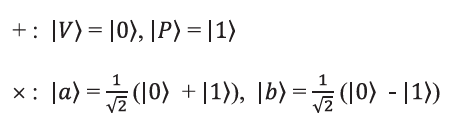



At the state planning organize, Alice haphazardly chooses one of the required bases, and 
after that arbitrarily chooses a bit esteem: or 1, and in agreement with this choice sends one 
of four signals (Table 1):

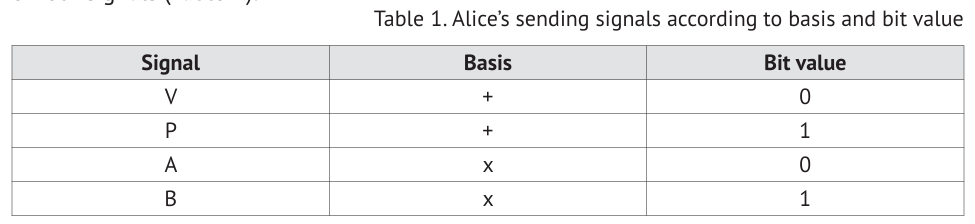



## **Code Implementation**

In [21]:
from classiq import *

In [22]:
@qfunc
def main(qba: Output[QArray[QBit]]) -> None:
    """
    Implements the quantum part of BB84 protocol with 8 qubits.
    """
    # Initialize qubits
    q = QArray[QBit]()
    allocate(8, q)
    
    # Print initial state for debugging
    print("Initial state allocation complete")
    
    # Alice's message - using bit flip (X) for 1s
    # Message: 10110100
    X(q[0])
    # q[1] remains |0>
    X(q[2])
    X(q[3])
    # q[4] remains |0>
    X(q[5])
    # q[6] and q[7] remain |0>
    
    print("After applying X gates to encode message")
    
    # Alice's bases: 01101001 (0=Z-basis, 1=X-basis)
    # Apply H gate for X-basis (diagonal basis)
    H(q[1])
    H(q[2])
    H(q[4])
    H(q[7])
    
    print("After applying H gates for Alice's X-basis")
    
    # Transmission of qubits happens here...
    
    # Bob's measurement bases: 11001011 (0=Z-basis, 1=X-basis)
    # Apply H gate to measure in X-basis
    H(q[0])
    H(q[1])
    # q[2] and q[3] measured in Z-basis
    H(q[4])
    # q[5] measured in Z-basis
    H(q[6])
    H(q[7])
    
    print("After applying H gates for Bob's X-basis")
    
    # Copy to output qubits for measurement
    allocate(8, qba)
    for i in range(8):
        qba[i] = q[i]
        
    print("Output qubits allocated and assigned")

In [23]:
# ===============================
# Quantum Model Creation
# ===============================
# Create a quantum model from the main function
qmod = create_model(main, out_file="bb84_implementation")

Initial state allocation complete
After applying X gates to encode message
After applying H gates for Alice's X-basis
After applying H gates for Bob's X-basis
Output qubits allocated and assigned


In [24]:
# ===============================
# Set Execution Preferences
# ===============================
from classiq.execution import ExecutionPreferences

execution_preferences = ExecutionPreferences(
    num_shots=2048
)
qmod = set_execution_preferences(qmod, execution_preferences)

In [25]:
# ===============================
# Circuit Synthesis and Execution
# ===============================
# Synthesize the quantum circuit to an executable form
qprog = synthesize(qmod)

In [26]:
# Visualize the generated quantum circuit
# display(show(qprog))

In [27]:
job = execute(qprog)

In [28]:
# ===============================
# Results Processing
# ===============================
# Fetch and print results from the quantum execution
print("Quantum Circuit Simulation:")
results = job.get_sample_result().parsed_counts
print(results)

Quantum Circuit Simulation:
[{'qba': [0, 0, 0, 0, 0, 0, 0, 0]}: 2048]


## **What Happens After the Measurement? (BB84 Explained)**
After Bob receives and measures the quantum bits (qubits), the BB84 protocol continues classically:

### **1. Basis Reconciliation**
Alice and Bob publicly share the bases they used to prepare and measure each qubit.

They then compare the bases for each position.

Bits where the bases match are kept; the rest are discarded.

### **2. Raw Key Extraction**
From the matched positions, Alice and Bob extract the raw key bits:

Alice uses her original message bits at those positions.

Bob uses his measurement results at those positions.

### **3. Error Estimation**
A small portion (typically ~25%) of the raw key is used to estimate the error rate.

If the error rate is low (e.g., <15%), they can assume no eavesdropping occurred.

### **4. Error Correction (Simulated Here)**
The remaining bits (after removing test bits) are treated as the corrected key.

In real QKD, error correction codes (like Cascade or LDPC) would be used.

### **5. Privacy Amplification**
To reduce an eavesdropper’s knowledge further, Alice and Bob apply a hash function.


In [29]:
import re
def extract_measurements_from_classiq_results(results):
    """
    Extract measurement results from Classiq's output format.
    """

    print("Raw results type:", type(results))
    print("Raw results:", results)
    
    measurements = {}
    
    
    try:
        if hasattr(results, 'items'):
            return {str(k): v for k, v in results.items()}
    except (AttributeError, TypeError):
        pass
    
    
    try:
        result_str = str(results)
        
        # Try to find patterns like [{'qba': [0,0,0,0,0,0,0,0]}: 2048]
        pattern = r"\[{'qba': \[(.*?)\]}: (\d+)\]"
        matches = re.findall(pattern, result_str)
        
        if matches:
            for bits_str, count_str in matches:
                bits = tuple(int(bit.strip()) for bit in bits_str.split(','))
                bits_joined = ''.join(str(bit) for bit in bits)
                measurements[bits_joined] = int(count_str)
            return measurements
        
        
        pattern = r"'qba': \[(.*?)\]"
        bits_match = re.search(pattern, result_str)
        if bits_match:
            bits_str = bits_match.group(1)
            bits = [int(bit.strip()) for bit in bits_str.split(',')]
            return {"".join(str(bit) for bit in bits): 1}
    except Exception as e:
        print(f"Error parsing results: {e}")
    
    print("Warning: Could not extract measurements, returning empty dictionary")
    return {}



In [30]:
def complete_bb84_protocol(measured_results):
    """
    Complete post-processing steps for the BB84 protocol.
    
    Args:
        measured_results: Results from quantum execution
    """
    # 1. Define the known values
    alice_message = [1, 0, 1, 1, 0, 1, 0, 0]
    alice_bases = [0, 1, 1, 0, 1, 0, 0, 1]    # 0=Z-basis, 1=X-basis
    bob_bases = [1, 1, 0, 0, 1, 0, 1, 1]      # 0=Z-basis, 1=X-basis
    
    # 2. Extract Bob's measurement results
    measurements_dict = extract_measurements_from_classiq_results(measured_results)
    
    # Get the most common measurement result
    if measurements_dict:
        most_common_bitstring = max(measurements_dict, key=measurements_dict.get)
        bob_measurements = [int(bit) for bit in most_common_bitstring]
    else:
        print("Warning: No measurements extracted, using all zeros")
        bob_measurements = [0] * 8
    
    print("\n=== BB84 Protocol Steps ===")
    print("1. QUANTUM PHASE (Already completed)")
    print("   - Alice prepared qubits in state corresponding to:", alice_message)
    print("   - Alice encoded using bases (0=Z, 1=X):", alice_bases)
    print("   - Bob measured using bases (0=Z, 1=X):", bob_bases)
    print("   - Bob's measurement results:", bob_measurements)
    
    # 3. BASIS RECONCILIATION PHASE
    print("\n2. BASIS RECONCILIATION (Public classical channel)")
    print("   - Alice announces: 'I used bases", alice_bases, "'")
    print("   - Bob announces: 'I used bases", bob_bases, "'")
    
    # 4. RAW KEY EXTRACTION
    matching_positions = []
    for i in range(len(alice_bases)):
        if alice_bases[i] == bob_bases[i]:
            matching_positions.append(i)
    
    print("\n3. RAW KEY EXTRACTION")
    print("   - Positions where bases match:", matching_positions)
    
    # Calculate Alice's raw key (what she expects)
    alice_raw_key = [alice_message[i] for i in matching_positions]
    
    # Calculate Bob's raw key (what he measured)
    bob_raw_key = [bob_measurements[i] for i in matching_positions]
    
    print("   - Alice's raw key:", alice_raw_key)
    print("   - Bob's raw key:", bob_raw_key)
    
    # 5. ERROR ESTIMATION
    if matching_positions:
        test_positions = matching_positions[:len(matching_positions)//4]  # Use 25% for testing
        key_positions = [pos for pos in matching_positions if pos not in test_positions]
        
        errors = 0
        for i in range(len(test_positions)):
            pos = test_positions[i]
            if alice_message[pos] != bob_measurements[pos]:
                errors += 1
        
        error_rate = errors / len(test_positions) if test_positions else 0
        
        print("\n4. ERROR ESTIMATION")
        print("   - Test positions:", test_positions)
        print("   - Errors detected:", errors)
        print(f"   - Error rate: {error_rate:.2%}")
        
        # 6. ERROR CORRECTION (simulated)
        corrected_key = []
        if error_rate < 0.15:  # Threshold for security
            print("\n5. ERROR CORRECTION")
            print("   - Error rate acceptable, proceeding with error correction")
            corrected_key = [alice_message[pos] for pos in key_positions]
            print("   - Positions used for final key:", key_positions)
            print("   - Corrected key:", corrected_key)
        else:
            print("\n5. PROTOCOL ABORT")
            print("   - Error rate too high, possible eavesdropper detected")
            print("   - Protocol aborted for security reasons")
        
        # 7. PRIVACY AMPLIFICATION (conceptual)
        final_key = None
        if corrected_key and len(corrected_key) >= 2:
            print("\n6. PRIVACY AMPLIFICATION")
            print("   - Applying hash function to reduce eavesdropper's information")
            final_key = []
            for i in range(0, len(corrected_key)-1, 2):
                final_key.append(corrected_key[i] ^ corrected_key[i+1])
            
            print(f"   - Final secure key: {final_key}")
            print(f"   - Key length: {len(final_key)} bits")
            print(f"   - Security level: approximately {len(final_key)/2} bits")
    else:
        print("\nNo matching bases found - cannot proceed with key generation")
        error_rate = 1.0
        final_key = None
    
    return {
        "alice_raw_key": alice_raw_key if 'alice_raw_key' in locals() else [],
        "bob_raw_key": bob_raw_key if 'bob_raw_key' in locals() else [],
        "error_rate": error_rate if 'error_rate' in locals() else 1.0,
        "final_key": final_key
    }


In [31]:
# ===============================
# Run the complete BB84 protocol
# ===============================

bb84_results = complete_bb84_protocol(results)

print("\nFinal Results Summary:")
print("Alice's raw key:", bb84_results["alice_raw_key"])
print("Bob's raw key:", bb84_results["bob_raw_key"])
print(f"Error rate: {bb84_results['error_rate']:.2%}")
print("Final secure key:", bb84_results["final_key"])

Raw results type: <class 'list'>
Raw results: [{'qba': [0, 0, 0, 0, 0, 0, 0, 0]}: 2048]

=== BB84 Protocol Steps ===
1. QUANTUM PHASE (Already completed)
   - Alice prepared qubits in state corresponding to: [1, 0, 1, 1, 0, 1, 0, 0]
   - Alice encoded using bases (0=Z, 1=X): [0, 1, 1, 0, 1, 0, 0, 1]
   - Bob measured using bases (0=Z, 1=X): [1, 1, 0, 0, 1, 0, 1, 1]
   - Bob's measurement results: [0, 0, 0, 0, 0, 0, 0, 0]

2. BASIS RECONCILIATION (Public classical channel)
   - Alice announces: 'I used bases [0, 1, 1, 0, 1, 0, 0, 1] '
   - Bob announces: 'I used bases [1, 1, 0, 0, 1, 0, 1, 1] '

3. RAW KEY EXTRACTION
   - Positions where bases match: [1, 3, 4, 5, 7]
   - Alice's raw key: [0, 1, 0, 1, 0]
   - Bob's raw key: [0, 0, 0, 0, 0]

4. ERROR ESTIMATION
   - Test positions: [1]
   - Errors detected: 0
   - Error rate: 0.00%

5. ERROR CORRECTION
   - Error rate acceptable, proceeding with error correction
   - Positions used for final key: [3, 4, 5, 7]
   - Corrected key: [1, 0, 1,

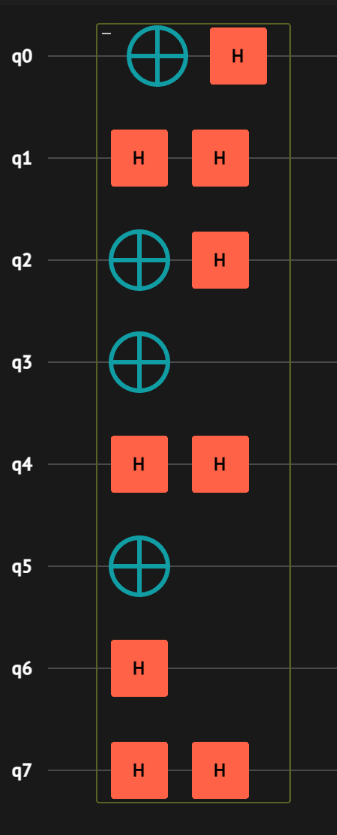

## **References**

[1] C. H. Bennett and G. Brassard, "Quantum cryptography: Public key distribution and coin tossing," *Proceedings of IEEE International Conference on Computers, Systems and Signal Processing*, Bangalore, India, 1984.

[2] M. Nielsen and I. Chuang, *Quantum Computation and Quantum Information*, Cambridge University Press, 2000.

[3] N. Gisin, G. Ribordy, W. Tittel, and H. Zbinden, "Quantum cryptography," *Rev. Mod. Phys.*, vol. 74, no. 1, pp. 145-195, 2002.

[4] V. Scarani, H. Bechmann-Pasquinucci, N. J. Cerf, et al., "The security of practical quantum key distribution," *Rev. Mod. Phys.*, vol. 81, no. 3, pp. 1301-1350, 2009.

[5] S. Pirandola, U. L. Andersen, L. Banchi, et al., "Advances in quantum cryptography," *Advances in Optics and Photonics*, vol. 12, no. 4, pp. 1012-1236, 2020.